In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [170]:
path = "../data/coffee/total-production.csv"

c_prod = pd.read_csv(path)

In [167]:
c_prod.set_index("total_production").T.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


In [19]:
melt_c_prod = c_prod.melt(
    id_vars="total_production",
    value_vars=c_prod.loc["Angola": "Yemen"],
    var_name="year",
    value_name="production"
).rename(columns={"total_production": "Country"})

In [34]:
melt_c_prod

,Country,year,production
0,Angola,1990,50.3450
1,Bolivia (Plurinational State of),1990,122.7770
2,Brazil,1990,27285.6286
3,Burundi,1990,487.3930
4,Ecuador,1990,1503.8150
...,...,...,...
1619,Trinidad & Tobago,2018,12.3647
1620,Uganda,2018,4703.9640
1621,Venezuela,2018,525.2602
1622,Viet Nam,2018,31174.0742


In [37]:
melt_c_prod.groupby("Country")["production"].sum().sort_values(ascending=False).head(10)

Country
Brazil       1.190966e+06
Viet Nam     4.395410e+05
Colombia     3.458714e+05
Indonesia    2.451168e+05
Ethiopia     1.415429e+05
India        1.320257e+05
Mexico       1.269082e+05
Guatemala    1.134011e+05
Honduras     1.054566e+05
Uganda       9.314637e+04
Name: production, dtype: float64

In [56]:
top10_producers = (
    melt_c_prod
    .groupby("Country")["production"]
    .sum()
    .sort_values(ascending=False)
    .iloc[:10]
    .rename(
        index={
            "Brazil": "BR",
            "Viet Nam": "VN",
            "Colombia": "CO",
            "Indonesia": "ID",
            "Ethiopia": "ET",
            "India": "IN",
            "Mexico": "MX",
            "Guatemala": "GT",
            "Honduras": "HN",
            "Uganda": "UG"
        }
    )
)
top10_producers = top10_producers / 1000000

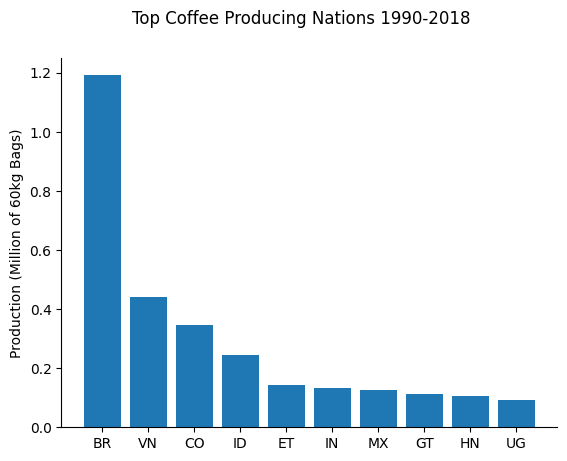

In [57]:
fig, ax = plt.subplots(
    figsize=(6.4, 4.8)
)

ax.bar(
    top10_producers.index,
    top10_producers
)

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Million of 60kg Bags)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

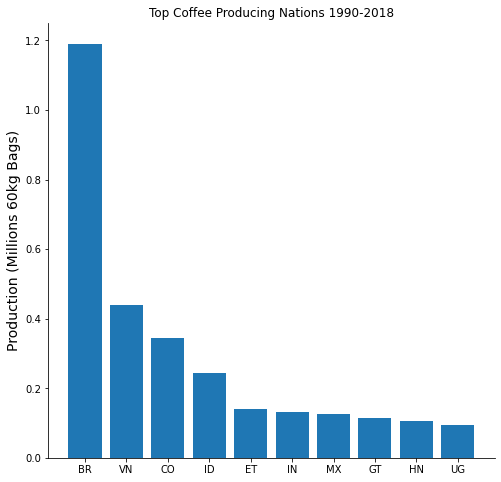

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [61]:
top5_producers = (
    melt_c_prod
    .groupby("Country")["production"]
    .sum()
    .sort_values(ascending=False)
    .iloc[:5]
    )

top5_producers.index

Index(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], dtype='object', name='Country')

In [80]:
top5 = c_prod[c_prod["total_production"].isin(top5_producers.index)]
top5 = top5.set_index("total_production").T

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [84]:
top5.index = top5.index.astype("datetime64[ns]")

In [86]:

top5.head()

total_production,Brazil,Indonesia,Colombia,Ethiopia,Viet Nam
1990-01-01,27285.6286,7441.383,14396.000,2909.451,1310.288
1991-01-01,27293.4934,8493.196,17980.397,2924.664,1437.848
1992-01-01,34603.3542,5569.478,14946.878,1825.171,2340.447
1993-01-01,28166.9786,6743.288,11422.422,2967.004,3020.216
1994-01-01,28192.0470,5367.878,12964.000,2762.730,3631.609


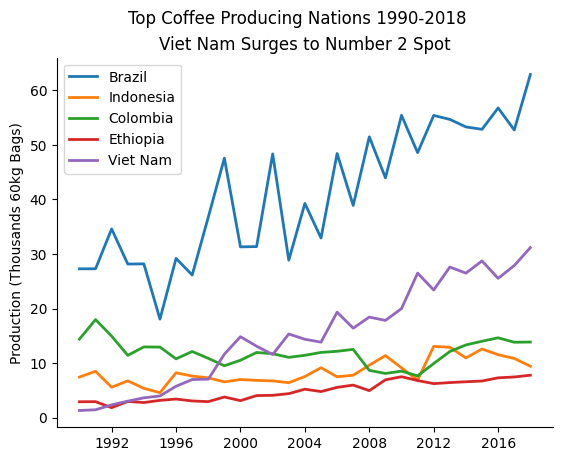

In [92]:
fig, ax = plt.subplots()

for i, column in enumerate(top5.columns):
    ax.plot(
        top5.index,
        top5[column] / 1000,
        label=column,
        linewidth=2
    )
    
fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")

ax.set_ylabel("Production (Thousands 60kg Bags)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left")
    
plt.show()

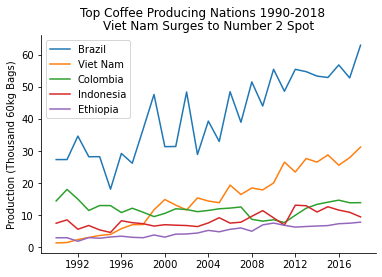

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [172]:
path = "../data/coffee/total-production.csv"

coffee = pd.read_csv(path)

coffee = coffee.set_index("total_production").T

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [193]:
brazil_others = coffee.assign(
    others = coffee.drop("Brazil", axis = 1).sum(axis=1)
).loc[:, ["Brazil", "others"]]
brazil_others.head()

total_production,Brazil,others
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


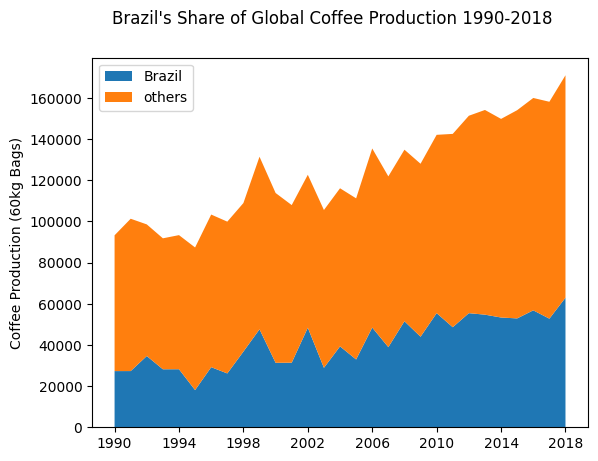

In [200]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_others.index,
    brazil_others["Brazil"],
    brazil_others["others"]
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_ylabel("Coffee Production (60kg Bags)")
ax.set_xticks(brazil_others.index[::4])

ax.legend(brazil_others.columns, loc="upper left")

plt.show()

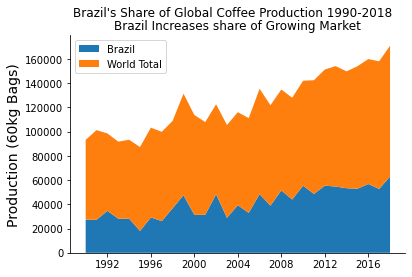

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

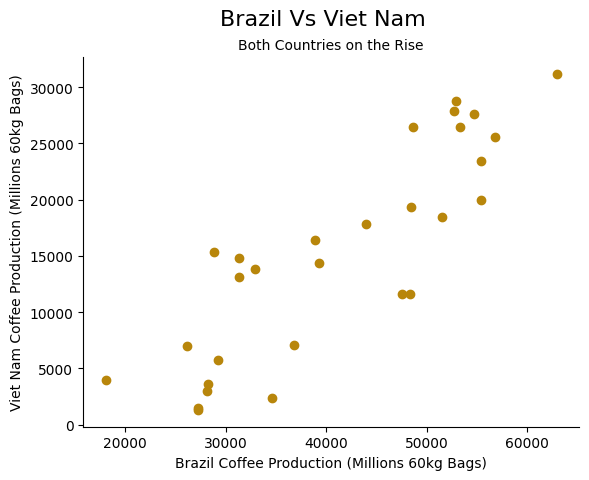

In [210]:
fig, ax = plt.subplots()

ax.scatter(
    x=coffee["Brazil"],
    y=coffee["Viet Nam"],
    color="darkgoldenrod"
)

fig.suptitle("Brazil Vs Viet Nam", fontsize=16)
ax.set_title("Both Countries on the Rise", fontsize=10)

ax.set_ylabel("Viet Nam Coffee Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Coffee Production (Millions 60kg Bags)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


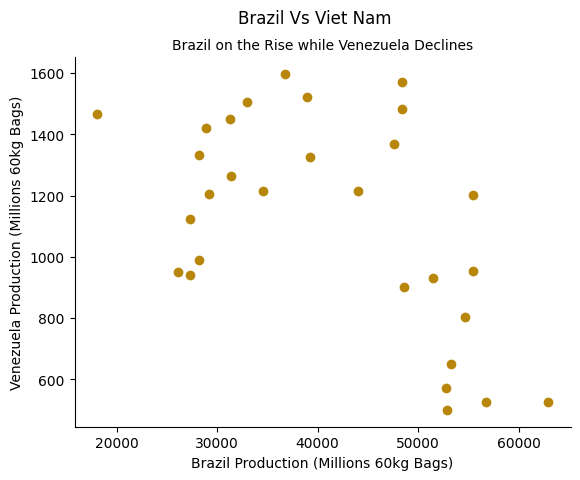

In [214]:
fig, ax = plt.subplots()

ax.scatter(
    x=coffee["Brazil"],
    y=coffee["Venezuela"],
    color="darkgoldenrod"
)

fig.suptitle("Brazil Vs Viet Nam", fontsize = 12)
ax.set_title("Brazil on the Rise while Venezuela Declines", fontsize = 10)

ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [218]:
coffee.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [229]:
list(top5_producers.index) + ["other"]

['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'other']

In [234]:
top5_vs = coffee.assign(
    others = coffee.drop(top5_producers.index, axis=1).sum(axis=1)
).loc[:,list(top5_producers.index) + ["others"]].sum(axis=0)

top5_vs


total_production
Brazil       1.190966e+06
Viet Nam     4.395410e+05
Colombia     3.458714e+05
Indonesia    2.451168e+05
Ethiopia     1.415429e+05
others       1.225392e+06
dtype: float64

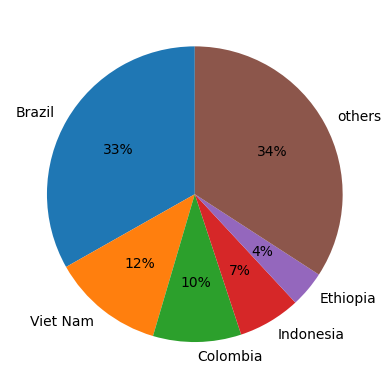

In [238]:
fig, ax = plt.subplots()

ax.pie(
    top5_vs,
    labels=top5_vs.index,
    startangle=90,
    autopct="%.0f%%"
)

plt.show()

In [239]:
coffee.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [257]:
brazil_others_1990 = coffee.assign(
    others=coffee.drop("Brazil", axis=1).sum(axis=1)
).loc["1990", ["Brazil", "others"]]

In [258]:
brazil_others_1990

total_production
Brazil    27285.6286
others    65944.4310
Name: 1990, dtype: float64

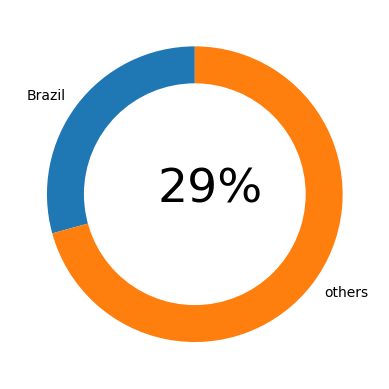

In [274]:
# braxil 29%

fig, ax = plt.subplots()

ax.pie(
    brazil_others_1990,
    labels=brazil_others_1990.index,
    startangle=90
)

donut_hole = plt.Circle((0, 0), .75, fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)

ax.text(
    -.25,
    -.05,
    "29%",
    fontsize=34
)


plt.show()

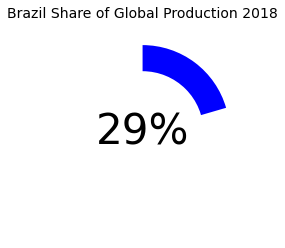

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [275]:
consumption = pd.read_csv("../data/coffee/imports.csv")


consumption.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [288]:
cons_melt = consumption.melt(
    id_vars="imports",
    var_name="year",
    value_name="consumption"
)

In [290]:
cons_melt.head()

,imports,year,consumption
0,Austria,1990,1880.0
1,Belgium,1990,NaN
2,Belgium/Luxembourg,1990,2015.0
3,Bulgaria,1990,268.0
4,Croatia,1990,NaN


In [276]:
prices = pd.read_csv("../data/coffee/retail-prices.csv")

prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [289]:
price_melt = prices.melt(
    id_vars="retail_prices",
    var_name="year",
    value_name="retail_price"
)

In [291]:
price_melt.head()

,retail_prices,year,retail_price
0,Austria,1990,10.816777
1,Cyprus,1990,6.247241
2,Denmark,1990,8.410596
3,Finland,1990,6.578366
4,France,1990,8.233996


In [295]:
price_cons = cons_melt.merge(
    price_melt,
    how="inner",
    left_on=["imports", "year"],
    right_on=["retail_prices", "year"]
).drop(["retail_prices"], axis=1)

In [316]:
price_cons["imports"] = price_cons["imports"].str.lstrip()

In [297]:
countries = ["Germany", "Japan", "Italy", "France", "Spain", "Netherlands", "Sweden", "Austria", "Finland", "Denmark", "Norway", "Cyprus"]

In [323]:
plot_df = (
    price_cons
    .loc[price_cons["imports"].isin(countries)]
    .groupby("imports")[["consumption", "retail_price"]].mean()
).sort_values("consumption", ascending=False)

In [324]:
plot_df.head(2)

,consumption,retail_price
imports,,
Germany,16357.666667,9.515110
Japan,6862.275235,21.472939


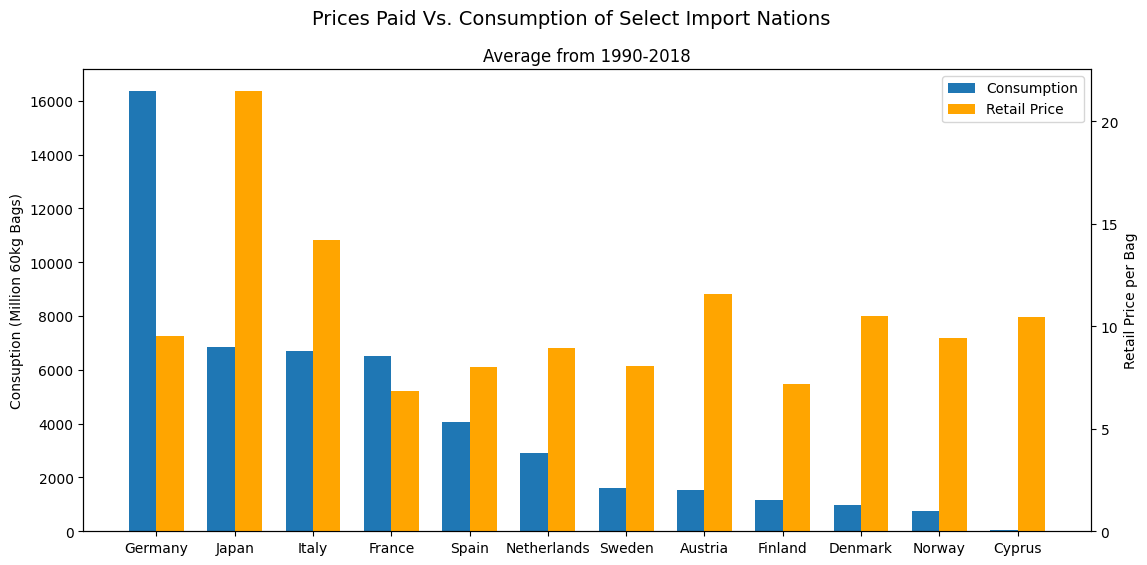

In [354]:
fig, ax = plt.subplots(figsize=(13,6))

width = .35
x = np.arange(len(plot_df))

ax.bar(
    x - width / 2,
    plot_df["consumption"],
    width=width,
    label="Consumption"
)

ax2 = ax.twinx()

ax2.bar(
    x + width / 2,
    plot_df["retail_price"],
    width=width,
    label="Retail Price",
    color="orange"
)

ax.set_ylabel("Consuption (Million 60kg Bags)")
ax2.set_ylabel("Retail Price per Bag")

ax.set_xticks(x)
ax.set_xticklabels(plot_df.index)

fig.legend(bbox_to_anchor=(.9, .88))
fig.suptitle("Prices Paid Vs. Consumption of Select Import Nations", fontsize = 14)
ax.set_title("Average from 1990-2018")

plt.show()